# ***Q1***

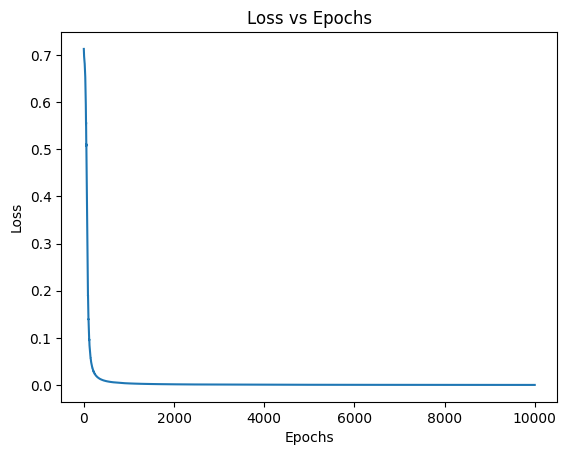

Predicted Output after training:
[[ 0.]
 [10.]
 [10.]
 [ 0.]]

Learned Parameters:
hidden.weight: [[ 3.5108285 -3.5109613]
 [-3.4986956  3.4985247]]
hidden.bias: [-7.771108e-05 -9.079497e-05]
output.weight: [[4.8898954 4.906949 ]]
output.bias: [-7.6273136]

Number of Learnable Parameters: 9


In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

class XORModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(XORModel, self).__init__()
        self.hidden = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.output = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.hidden(x)
        x = self.relu(x)
        x = self.output(x)
        # x = self.relu(x)
        return x

X = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
y = torch.tensor([[0], [1], [1], [0]], dtype=torch.float32)

# Model, Loss, and Optimizer
input_size = 2
hidden_size = 2
output_size = 1

model = XORModel(input_size, hidden_size, output_size)
criterion = nn.BCEWithLogitsLoss()  # Binary Cross Entropy Loss
optimizer = optim.SGD(model.parameters(), lr=0.5)

# Training the model
epochs = 10000
loss_list = []

for epoch in range(epochs):
    # Forward pass
    outputs = model(X)
    loss = criterion(outputs, y)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    loss_list.append(loss.item())

plt.plot(range(epochs), loss_list)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.show()


# Model predictions
with torch.no_grad():
    raw_predictions = model(X)
    predictions = torch.round(torch.relu(model(X)))

# Print final predictions and learned parameters
print("Predicted Output after training:")
print(predictions.numpy())
print("\nLearned Parameters:")
for param_tensor in model.state_dict():
    print(f"{param_tensor}: {model.state_dict()[param_tensor].numpy()}")

# Count the number of learnable parameters
num_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print("\nNumber of Learnable Parameters:", num_params)


# ***Q4***

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define the neural network model
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size2, output_size)

    def forward(self, x):
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        return x

# Load MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Set random seed for reproducibility
torch.manual_seed(42)

# Parameters
input_size = 28 * 28  # MNIST images are 28x28 pixels
hidden_size1 = 128
hidden_size2 = 64
output_size = 10  # 10 classes for digits 0-9

# Instantiate the model
model = NeuralNetwork(input_size, hidden_size1, hidden_size2, output_size)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# DataLoader for training and testing
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

# Training the model
epochs = 5

for epoch in range(epochs):
    model.train()
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

# Testing the model
model.eval()
all_labels = []
all_predictions = []

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predictions = torch.max(outputs, 1)
        all_labels.extend(labels.numpy())
        all_predictions.extend(predictions.numpy())

# Display confusion matrix
cm = confusion_matrix(all_labels, all_predictions)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Calculate accuracy
accuracy = sum([cm[i, i] for i in range(10)]) / len(all_labels)
print("Classification Accuracy:", accuracy)

# Count the number of learnable parameters
num_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print("\nNumber of Learnable Parameters:", num_params)


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|█████████████████████████████| 9912422/9912422 [00:15<00:00, 622206.75it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|█████████████████████████████████| 28881/28881 [00:00<00:00, 127722.87it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|████████████████████████████| 1648877/1648877 [00:01<00:00, 1177728.69it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████████████████████████████| 4542/4542 [00:00<00:00, 2837856.21it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

